In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

# Data Files

In [2]:
electric_car_data=pd.read_csv("ElectricCarData_Clean_Me.csv") #Contain data about differnet electric cars available in the market

buyers=pd.read_csv("Indian automobile buying behaviour study 1.0.csv")#Contain data about customers of automobile market in India

location=pd.read_csv("Location_data.csv")#Contain data from different states and union territories  

In [3]:
electric_car_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
electric_car_data.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

<AxesSubplot:>

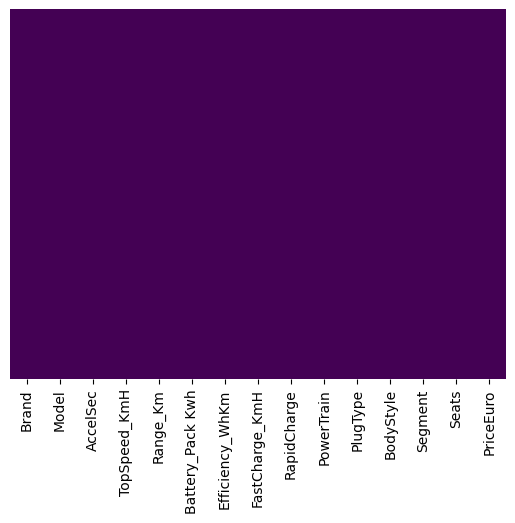

In [5]:
sns.heatmap(electric_car_data.isna(),yticklabels=False,cbar=None,cmap="viridis")

In [6]:
electric_car_data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000


Text(0.5, 1.0, 'Price distribution')

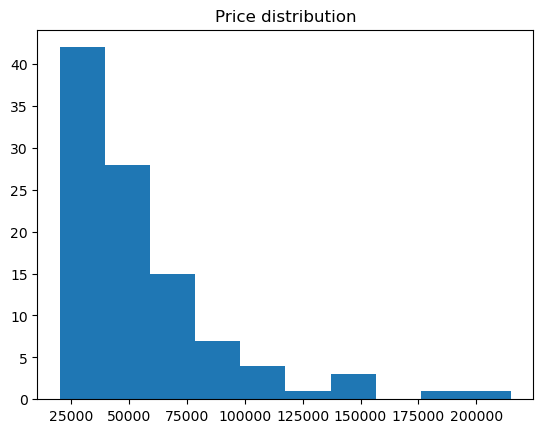

In [7]:
plt.hist(electric_car_data['PriceEuro'],bins=10)
plt.title("Price distribution")

In [8]:
electric_car_data[electric_car_data['PriceEuro']==electric_car_data['PriceEuro'].max()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,200.0,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000


In [9]:
electric_car_data[electric_car_data['PriceEuro']==electric_car_data['PriceEuro'].min()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
44,SEAT,Mii Electric,12.3,130,195,32.3,166,170,Yes,FWD,Type 2 CCS,Hatchback,A,4,20129


In [10]:
electric_car_data['PriceEuro'][electric_car_data['PriceEuro'] < 30000].count()

12

<AxesSubplot:xlabel='PriceEuro', ylabel='Segment'>

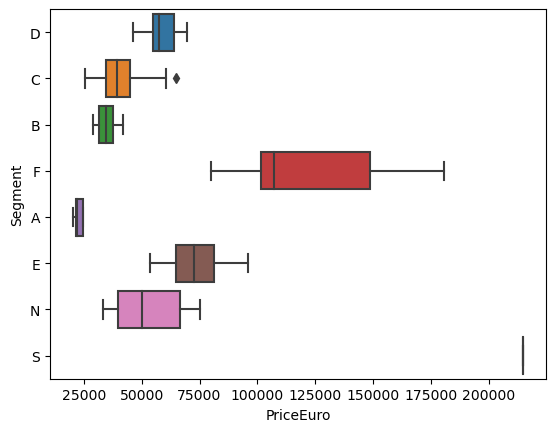

In [11]:
sns.boxplot(data=electric_car_data,x='PriceEuro',y='Segment')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BodyStyle', ylabel='count'>

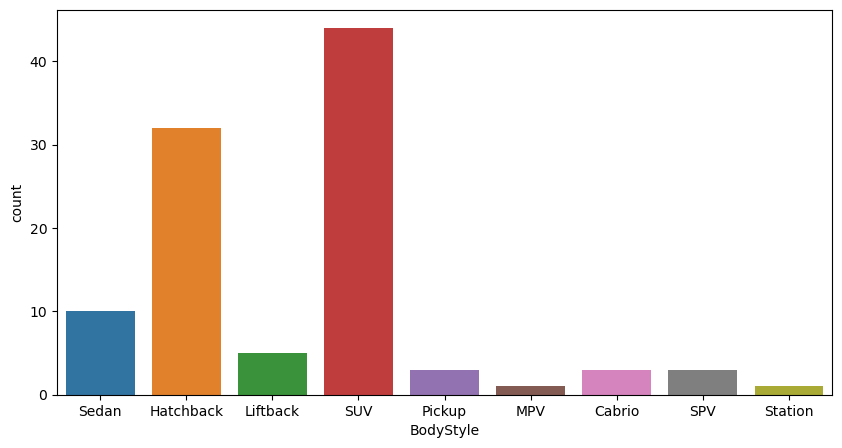

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(electric_car_data['BodyStyle'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Segments')

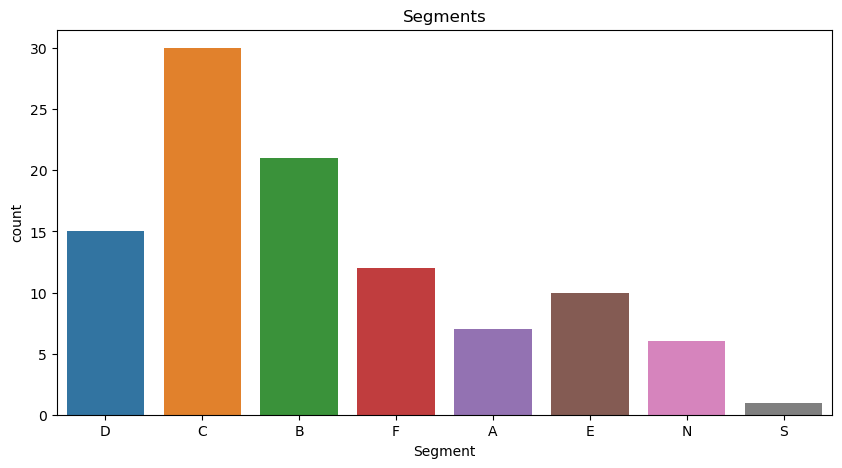

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(electric_car_data['Segment'])
plt.title('Segments')

Text(0.5, 1.0, 'Count plot of Body Style')

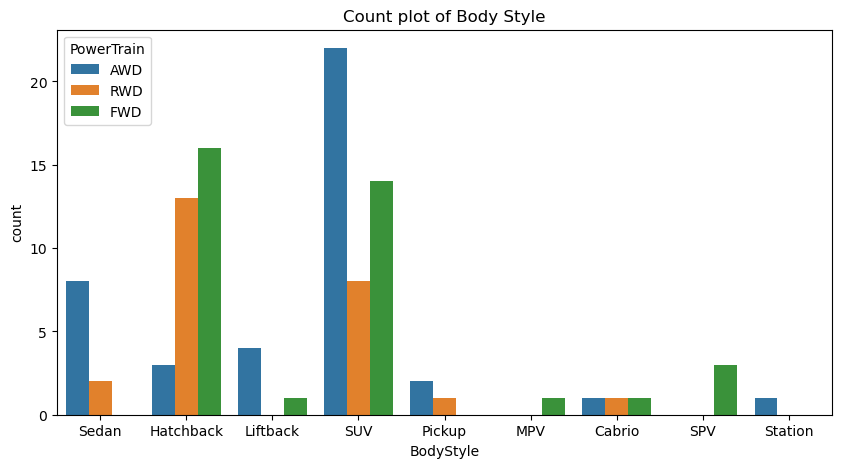

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='BodyStyle', data=electric_car_data, hue='PowerTrain')
plt.title('Count plot of Body Style')

<AxesSubplot:xlabel='PriceEuro', ylabel='BodyStyle'>

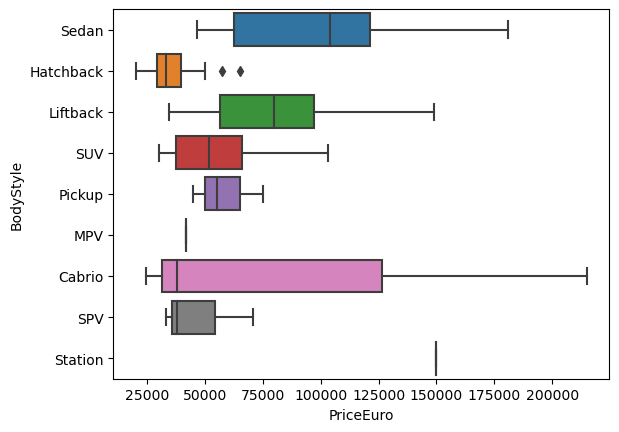

In [15]:
sns.boxplot(data=electric_car_data,x='PriceEuro',y='BodyStyle')

Text(0.5, 1.0, 'Efficiency vs Price')

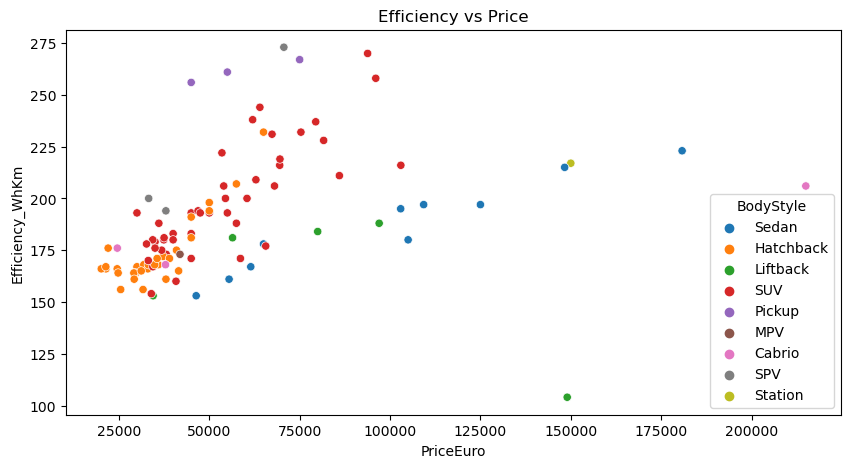

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PriceEuro', y='Efficiency_WhKm', data=electric_car_data, hue='BodyStyle')
plt.title('Efficiency vs Price')

Text(0.5, 1.0, 'Battery Pack vs vs Price')

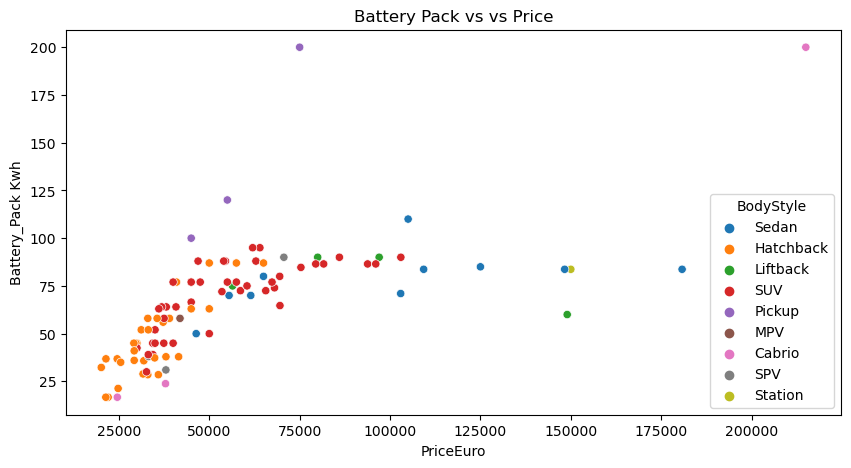

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PriceEuro', y='Battery_Pack Kwh', data=electric_car_data, hue='BodyStyle')
plt.title('Battery Pack vs vs Price')

Text(0.5, 1.0, 'Rapid Charge availability')

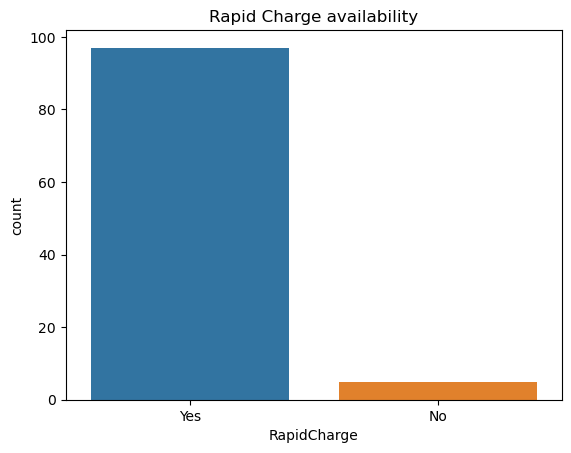

In [18]:
sns.countplot(x='RapidCharge', data=electric_car_data)
plt.title('Rapid Charge availability')

Text(0.5, 1.0, 'Fast Charging vs vs Price')

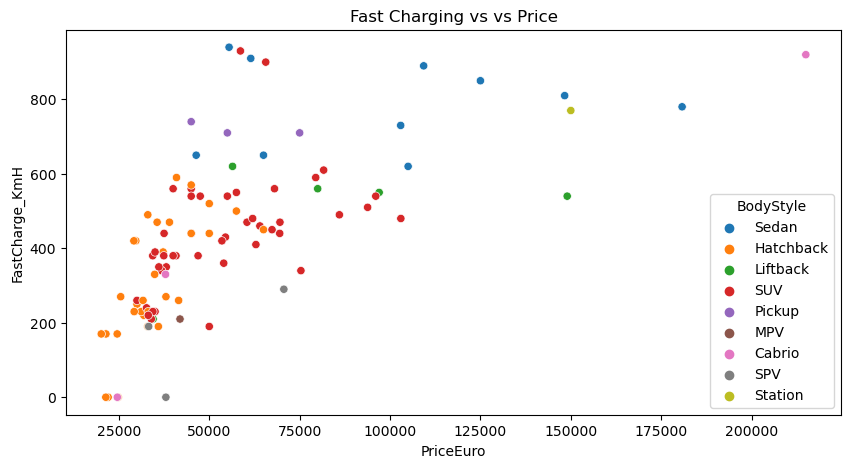

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PriceEuro', y='FastCharge_KmH', data=electric_car_data, hue='BodyStyle')
plt.title('Fast Charging vs vs Price')

Text(0.5, 1.0, 'Range vs Price')

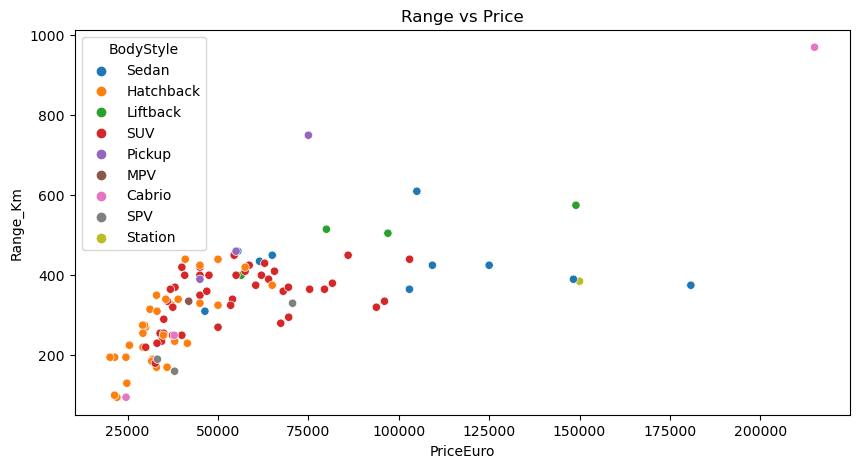

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PriceEuro', y='Range_Km', data=electric_car_data, hue='BodyStyle')
plt.title('Range vs Price')

# Market Segmentation using Buyers Data

In [21]:
buyers.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [22]:
buyers.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

<AxesSubplot:>

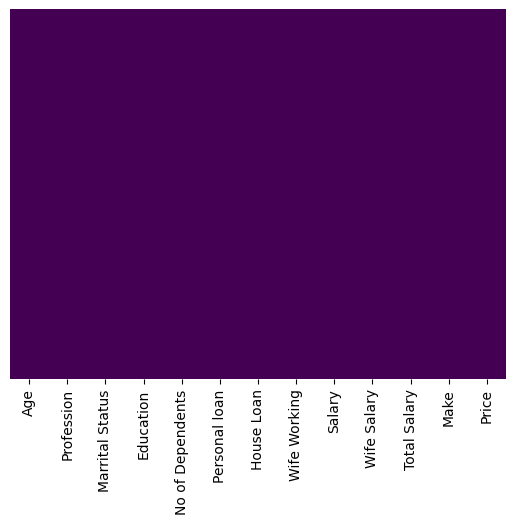

In [23]:
sns.heatmap(buyers.isna(),yticklabels=False,cbar=None,cmap="viridis")

In [24]:
pd.DataFrame(buyers['Make'].value_counts())

,Make
SUV,19
Baleno,19
Creata,14
i20,12
Ciaz,12
City,10
Duster,7
Verna,4
Luxury,2


Changing all the make to body style

In [25]:
buyers['Make'].replace(to_replace=('Baleno','Creata','i20','Ciaz','City','Duster','Verna'), value=('Hatchback','SUV','Hatchback','Sedan','Sedan','SUV','Sedan'), inplace = True)

In [26]:
pd.DataFrame(buyers['Make'].value_counts())

,Make
SUV,40
Hatchback,31
Sedan,26
Luxury,2


In [27]:
buyers.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


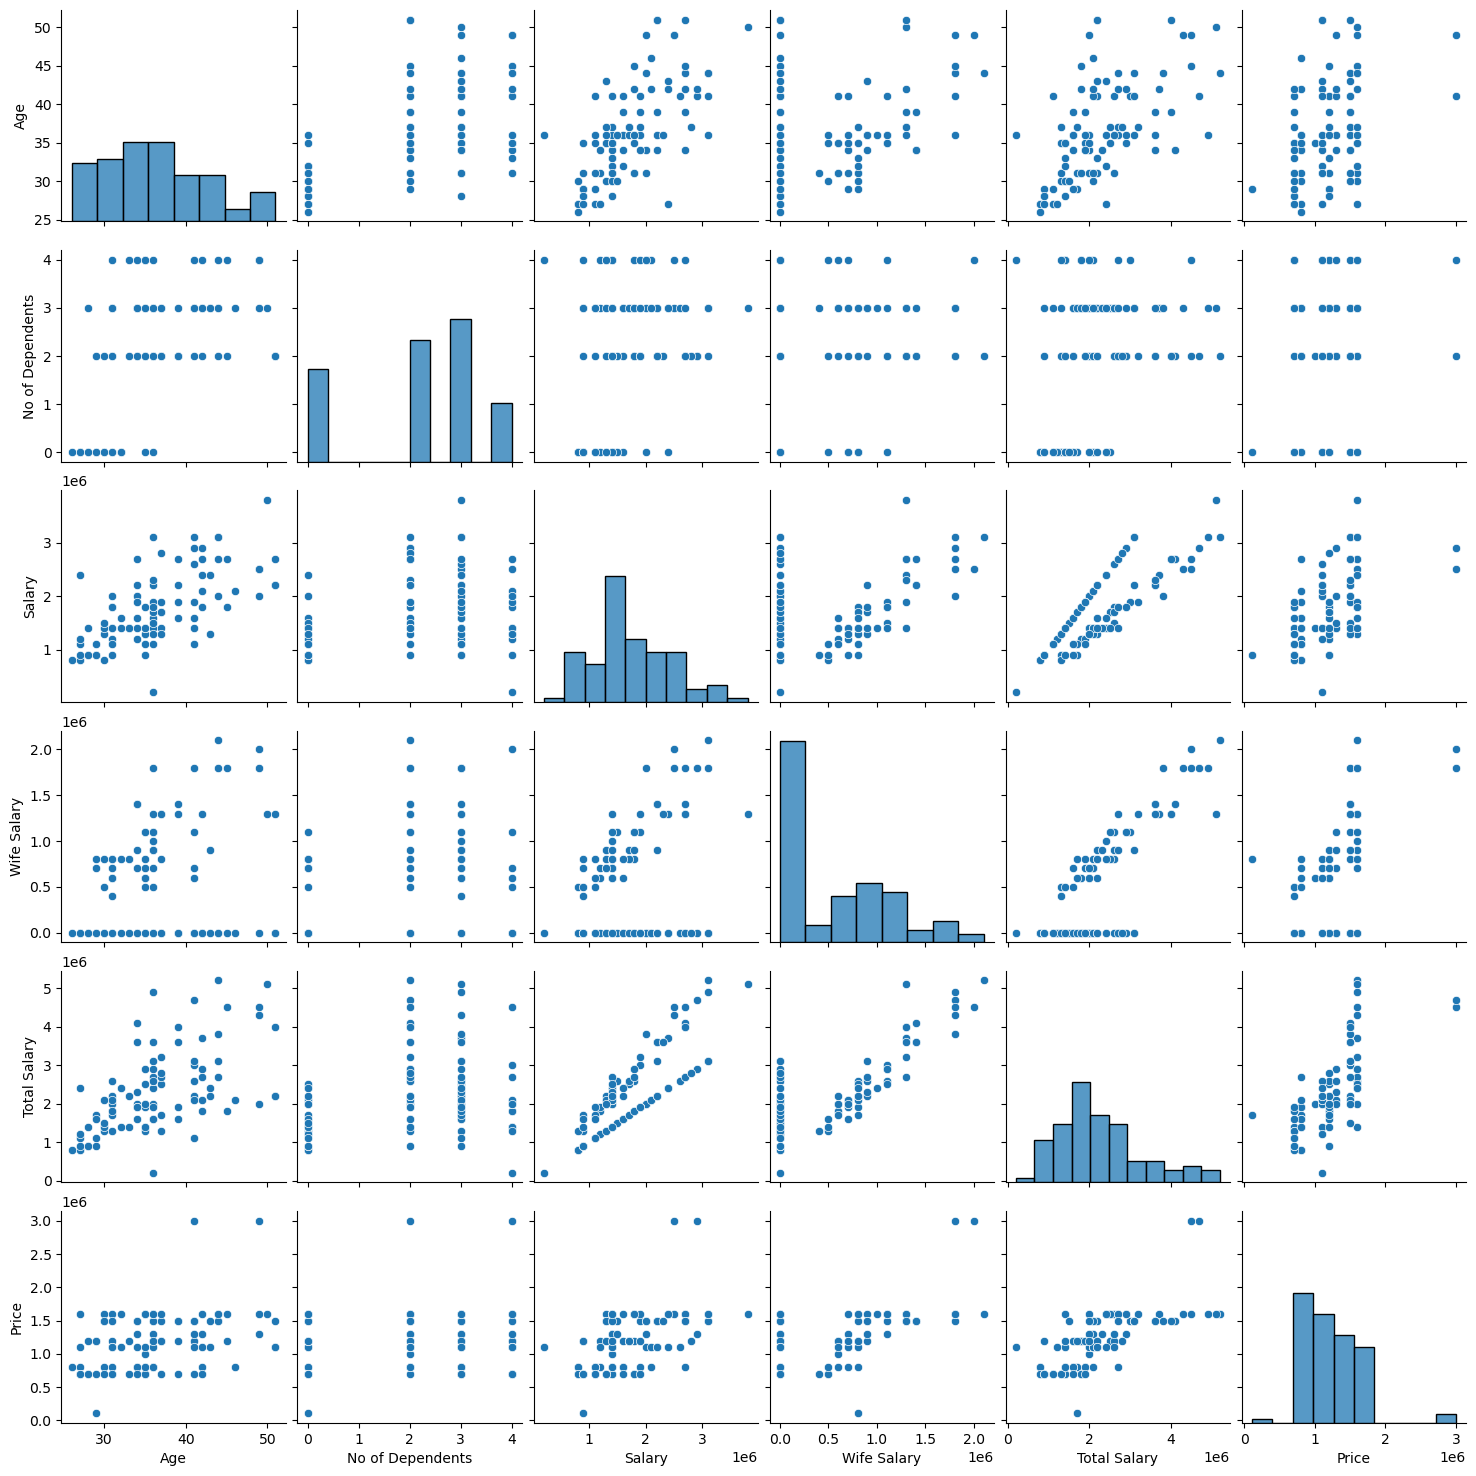

In [28]:
sns.pairplot(buyers)

<AxesSubplot:xlabel='Price', ylabel='Count'>

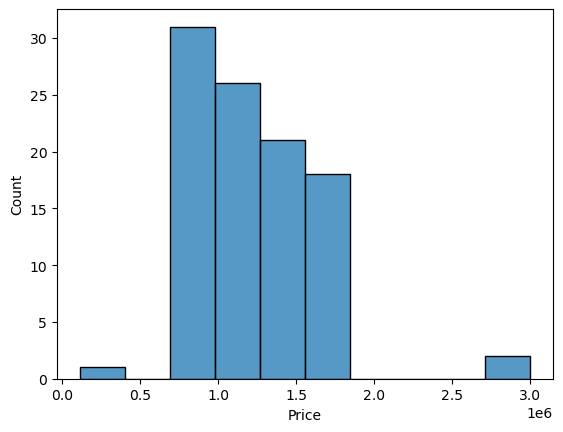

In [29]:
sns.histplot(buyers,x="Price")

<AxesSubplot:xlabel='Total Salary', ylabel='Price'>

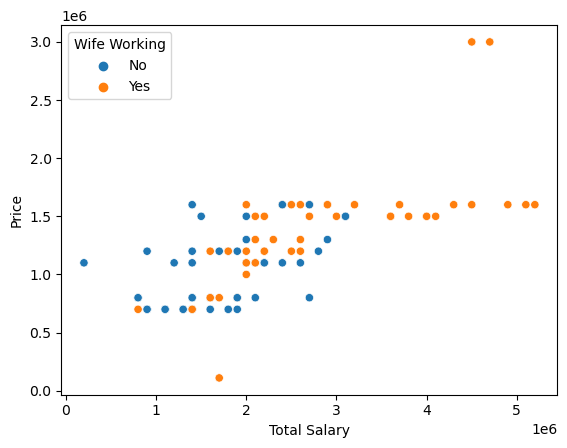

In [30]:
sns.scatterplot(data=buyers, x="Total Salary",y="Price",hue="Wife Working")

<AxesSubplot:xlabel='Total Salary', ylabel='Price'>

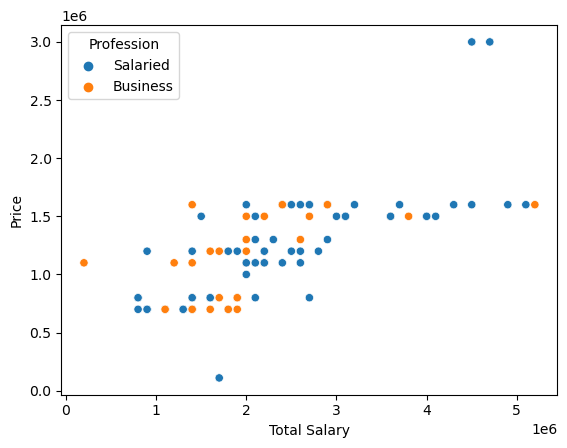

In [31]:
sns.scatterplot(data=buyers, x="Total Salary",y="Price",hue="Profession")

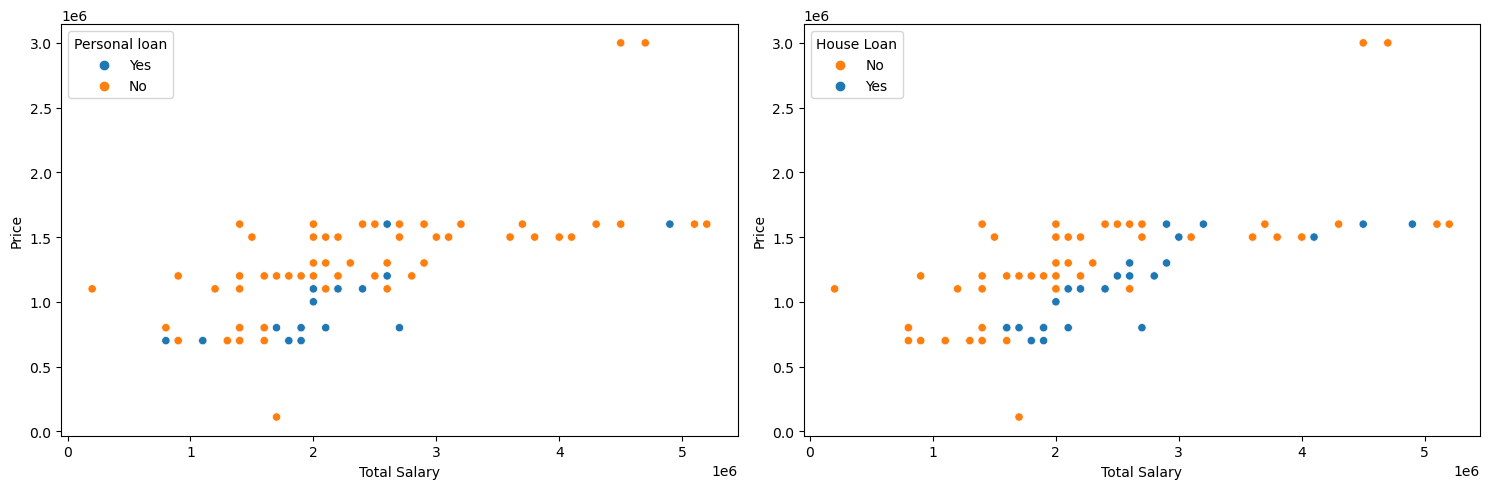

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=buyers, x="Total Salary",y="Price",hue="Personal loan")

plt.subplot(1,2,2)
sns.scatterplot(data=buyers, x="Total Salary",y="Price",hue="House Loan",palette={"Yes": "tab:blue", "No":"tab:orange"})
plt.tight_layout()

# PRINCIPAL COMPONENT ANALYSIS

In [33]:
buyers_new=buyers.replace(to_replace=('Yes','No'), value=(1,0), inplace = False)

In [34]:
buyers_new=pd.get_dummies(buyers_new,columns = ['Education','Profession', 'Marrital Status','Make']).drop(axis=1,columns=["Education_Graduate","Profession_Business","Marrital Status_Single","Make_Hatchback"])

In [35]:
buyers_new

,Age,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Education_Post Graduate,Profession_Salaried,Marrital Status_Married,Make_Luxury,Make_SUV,Make_Sedan
0,27,0,1,0,0,800000,0,800000,800000,1,1,0,0,0,0
1,35,2,1,1,1,1400000,600000,2000000,1000000,1,1,1,0,0,1
2,45,4,1,1,0,1800000,0,1800000,1200000,0,0,1,0,1,0
3,41,3,0,0,1,1600000,600000,2200000,1200000,1,0,1,0,0,1
4,31,2,1,0,1,1800000,800000,2600000,1600000,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,0,0,0,2400000,0,2400000,1600000,0,0,0,0,1,0
95,50,3,0,0,1,3800000,1300000,5100000,1600000,1,1,1,0,1,0
96,51,2,1,1,0,2200000,0,2200000,1100000,0,0,1,0,0,1
97,51,2,0,0,1,2700000,1300000,4000000,1500000,1,1,1,0,1,0


In [36]:
df_scaled=StandardScaler().fit_transform(buyers_new)

In [37]:
pca = PCA(n_components=15)
pca.fit(df_scaled)
pca.explained_variance_ratio_.cumsum().round(3)

array([0.313, 0.467, 0.56 , 0.649, 0.732, 0.804, 0.862, 0.908, 0.934,
       0.96 , 0.977, 0.993, 0.998, 1.   , 1.   ])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

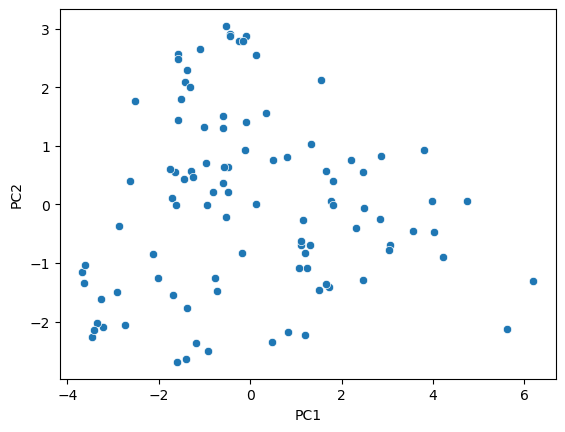

In [38]:
componentsdf=pd.DataFrame(data=pca.fit_transform(df_scaled),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
sns.scatterplot(x='PC1',y='PC2',data=componentsdf)

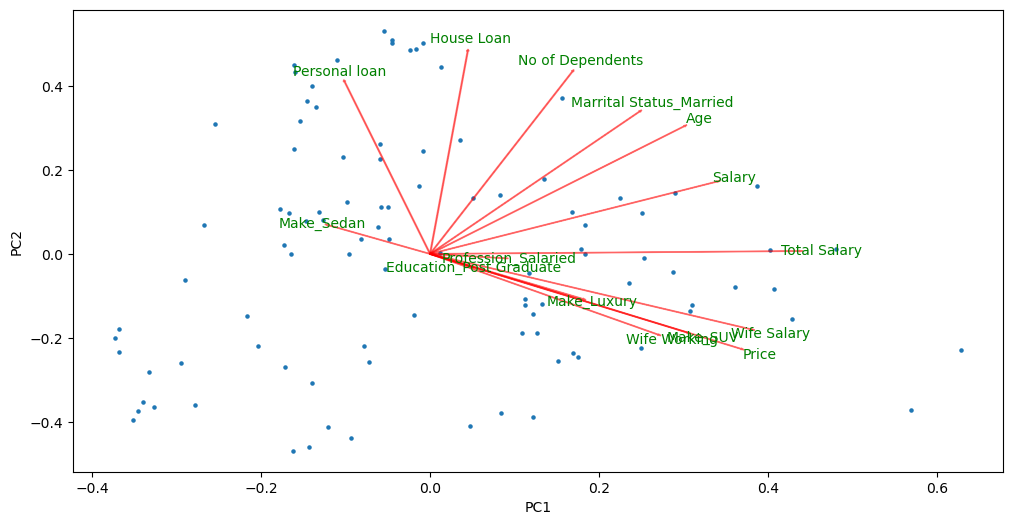

In [39]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        
        plt.text(coeff[i,0]*1.06, coeff[i,1]*1.06 , labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.figure(figsize=(12, 6))
biplot(pca.fit_transform(df_scaled), np.transpose(pca.components_), buyers_new.columns)

In [40]:
df_scaled

array([[-1.4986304 , -1.64231252,  1.44697961, ..., -0.14359163,
        -0.82338697, -0.59679509],
       [-0.21130364, -0.13685938,  1.44697961, ..., -0.14359163,
        -0.82338697,  1.67561699],
       [ 1.39785482,  1.36859377,  1.44697961, ..., -0.14359163,
         1.21449578, -0.59679509],
       ...,
       [ 2.36334989, -0.13685938,  1.44697961, ..., -0.14359163,
        -0.82338697,  1.67561699],
       [ 2.36334989, -0.13685938, -0.69109474, ..., -0.14359163,
         1.21449578, -0.59679509],
       [ 2.36334989, -0.13685938,  1.44697961, ..., -0.14359163,
        -0.82338697,  1.67561699]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='Error of Cluster'>

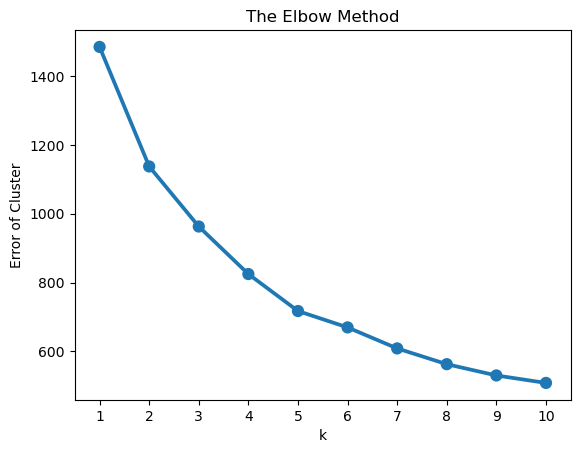

In [41]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)

In [42]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

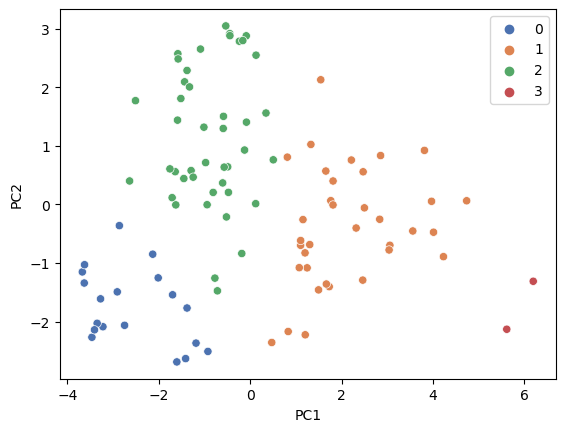

In [43]:
sns.scatterplot(x='PC1',y='PC2',data=componentsdf, hue=model.labels_, palette="deep")

<AxesSubplot:xlabel='Price', ylabel='Total Salary'>

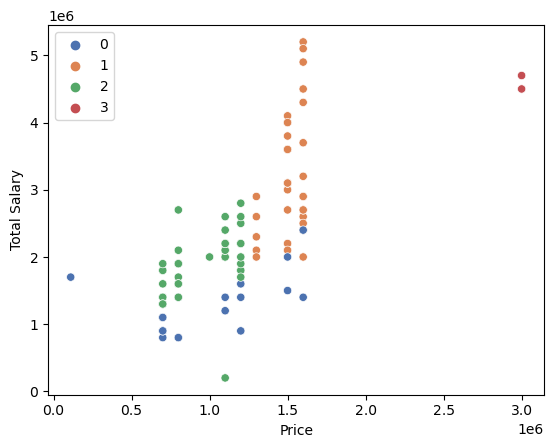

In [44]:
sns.scatterplot(x='Price',y='Total Salary',data=buyers, hue=model.labels_, palette="deep")

# KPrototype Segmentation

<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='Cost of Cluster'>

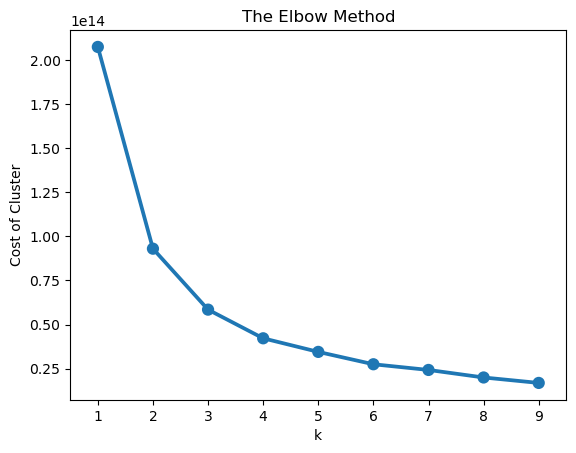

In [45]:
cost = []
for k in range(1, 11):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    #kproto = KPrototypes(n_clusters=k, verbose=2,max_iter=20)
    try:
        kproto = KPrototypes(n_clusters = k, init = 'Huang', random_state = 0)
        kproto.fit(buyers, categorical=[1,2,3,5,6,7,11])
        cost.append(kproto.cost_)
    except:
        break
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Cost of Cluster')
sns.pointplot(x=list(range(1, 10)), y=cost)

In [46]:
# kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
# clusters = kmode.fit_predict(buyers)
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20)
clusters=kproto.fit(buyers, categorical=[1,2,3,5,6,7,11])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 18, ncost: 59557723182571.95
Run: 1, iteration: 2/20, moves: 7, ncost: 58520585004145.82
Run: 1, iteration: 3/20, moves: 0, ncost: 58520585004145.82
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 25, ncost: 73463008166963.14
Run: 2, iteration: 2/20, moves: 21, ncost: 63034600907886.76
Run: 2, iteration: 3/20, moves: 9, ncost: 59557723182571.95
Run: 2, iteration: 4/20, moves: 7, ncost: 58520585004145.82
Run: 2, iteration: 5/20, moves: 0, ncost: 58520585004145.82
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 18, ncost: 69738368754109.52
Run: 3, iteration: 2/20, m

In [47]:
clusters

KPrototypes(gamma=229461.18592955195, max_iter=20, n_clusters=3, verbose=2)

In [48]:
clusters.labels_

array([0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2], dtype=uint16)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

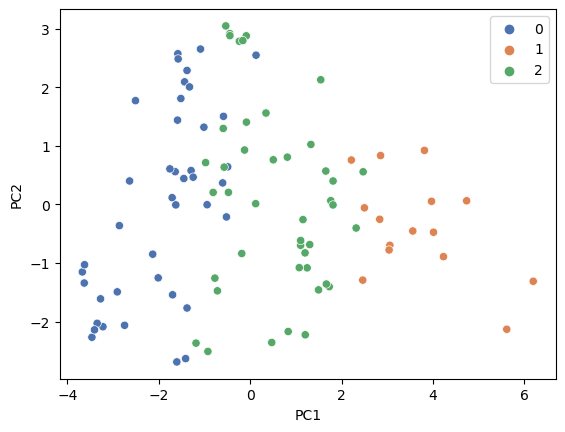

In [49]:
sns.scatterplot(x='PC1',y='PC2',data=componentsdf, hue=clusters.labels_, palette="deep")

<AxesSubplot:xlabel='Price', ylabel='Total Salary'>

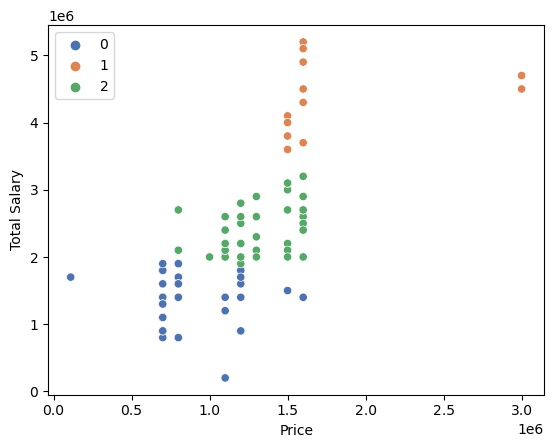

In [50]:
sns.scatterplot(x='Price',y='Total Salary',data=buyers, hue=clusters.labels_, palette="deep")

In [51]:
buyers['cluster']=clusters.labels_

In [52]:
buyers

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,Hatchback,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Sedan,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,SUV,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,Sedan,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,2
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Sedan,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,SUV,1500000,1


In [53]:
buyers['cluster'].value_counts()

2    43
0    41
1    15
Name: cluster, dtype: int64

In [54]:
buyers[['Profession','cluster']].groupby('cluster').value_counts()

cluster  Profession
0        Salaried      21
         Business      20
1        Salaried      12
         Business       3
2        Salaried      31
         Business      12
dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='Age'>

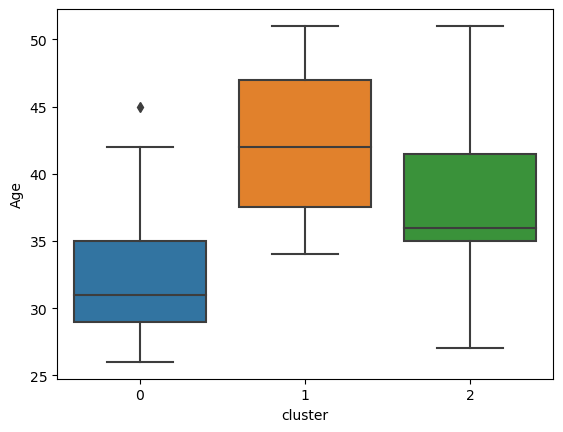

In [55]:
sns.boxplot(x="cluster", y="Age", data=buyers)

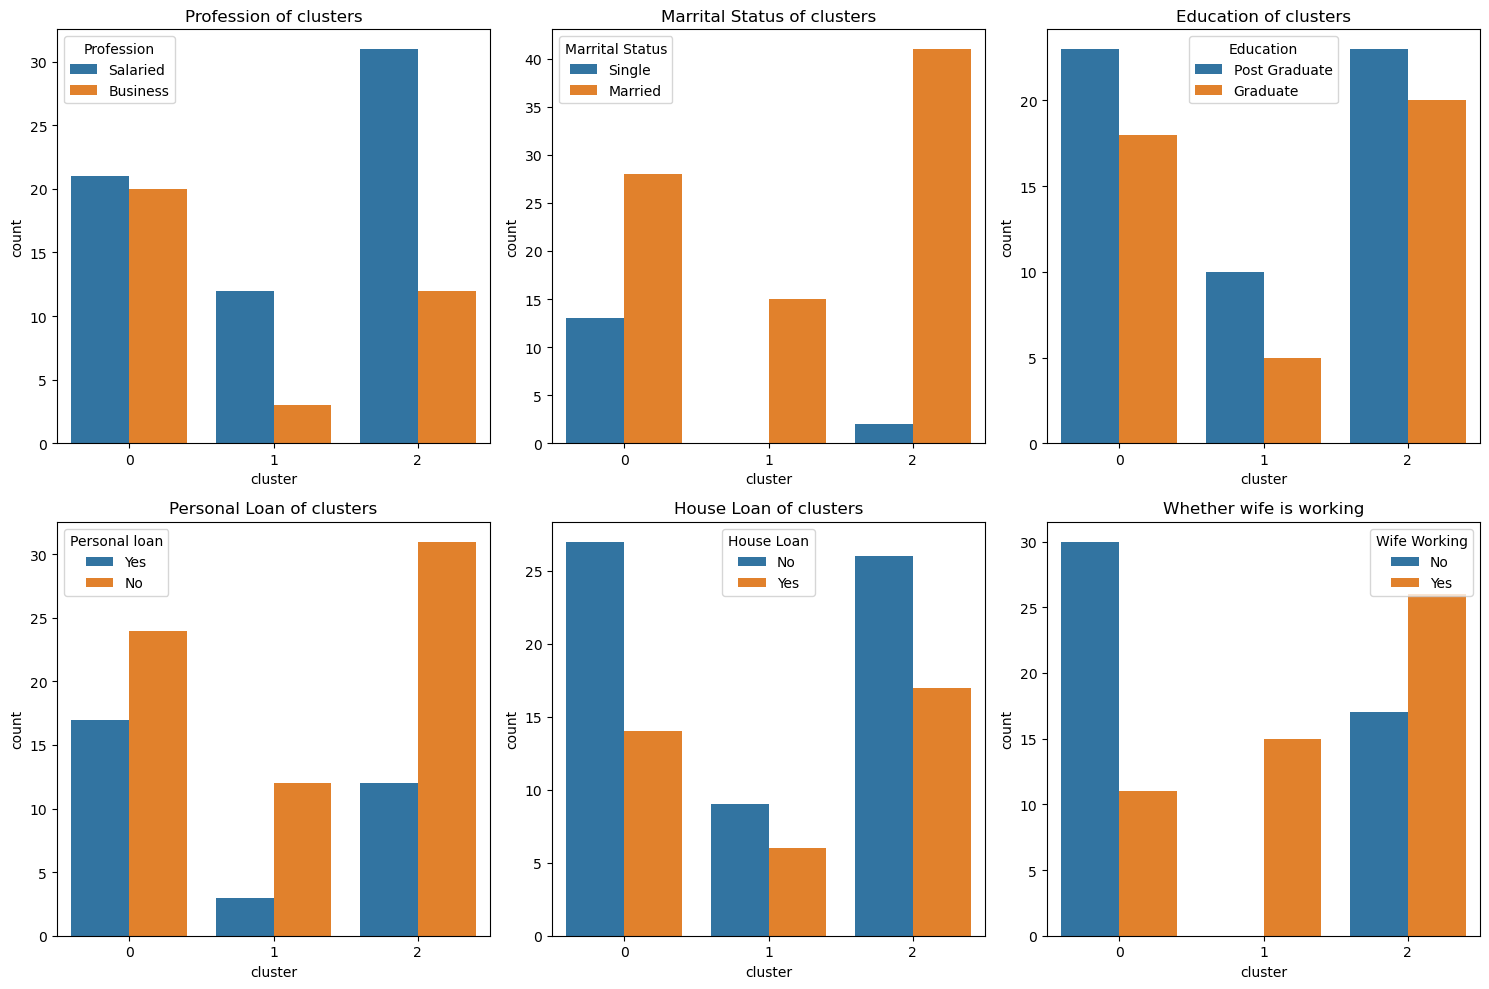

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Profession of clusters')
sns.countplot(x='cluster',hue='Profession',data=buyers)

plt.subplot(2,3,2)
plt.title('Marrital Status of clusters')
sns.countplot(x='cluster',hue='Marrital Status',data=buyers)

plt.subplot(2,3,3)
plt.title('Education of clusters')
sns.countplot(x='cluster',hue='Education',data=buyers)

plt.subplot(2,3,4)
plt.title('Personal Loan of clusters')
sns.countplot(x='cluster',hue='Personal loan',data=buyers)

plt.subplot(2,3,5)
plt.title('House Loan of clusters')
sns.countplot(x='cluster',hue='House Loan',data=buyers)

plt.subplot(2,3,6)
plt.title('Whether wife is working')
sns.countplot(x='cluster',hue='Wife Working',data=buyers)
plt.tight_layout()

<AxesSubplot:title={'center':'Make prefered by clusters'}, xlabel='cluster', ylabel='count'>

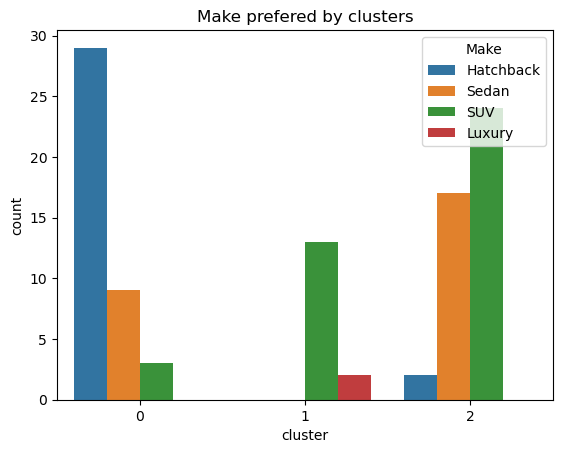

In [57]:
plt.title('Make prefered by clusters')
sns.countplot(x='cluster',hue='Make',data=buyers)

In [58]:
buyers[['Make','cluster']].groupby('cluster').value_counts()

cluster  Make     
0        Hatchback    29
         Sedan         9
         SUV           3
1        SUV          13
         Luxury        2
2        SUV          24
         Sedan        17
         Hatchback     2
dtype: int64

# Location Data

In [59]:
location.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of Operational PCS
0,Andaman & Nicobar,162,146945,147107,3
1,Arunachal Pradesh,20,252965,252985,9
2,Assam,64766,4677053,4741819,48
3,Bihar,83335,10407078,10490413,83
4,Chandigarh,2812,746881,749693,6


In [60]:
location.columns

Index(['State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total', 'No. of Operational PCS'],
      dtype='object')

In [61]:
location.describe()

,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of Operational PCS
count,30.000000,3.000000e+01,3.000000e+01,30.000000
mean,44477.933333,9.260523e+06,9.305001e+06,194.133333
std,69664.616868,1.091429e+07,1.096983e+07,364.077269
min,20.000000,9.718900e+04,9.721000e+04,1.000000
25%,1418.500000,6.742398e+05,6.818892e+05,16.500000
50%,18888.500000,5.581995e+06,5.622784e+06,48.000000
75%,60766.250000,1.371638e+07,1.375666e+07,194.250000
max,337180.000000,4.009249e+07,4.042967e+07,1845.000000


In [62]:
pd.DataFrame(location.drop(axis=0, columns='State Name').sum())

,0
Total Electric Vehicle,1334338
Total Non-Electric Vehicle,277815703
Total,279150041
No. of Operational PCS,5824


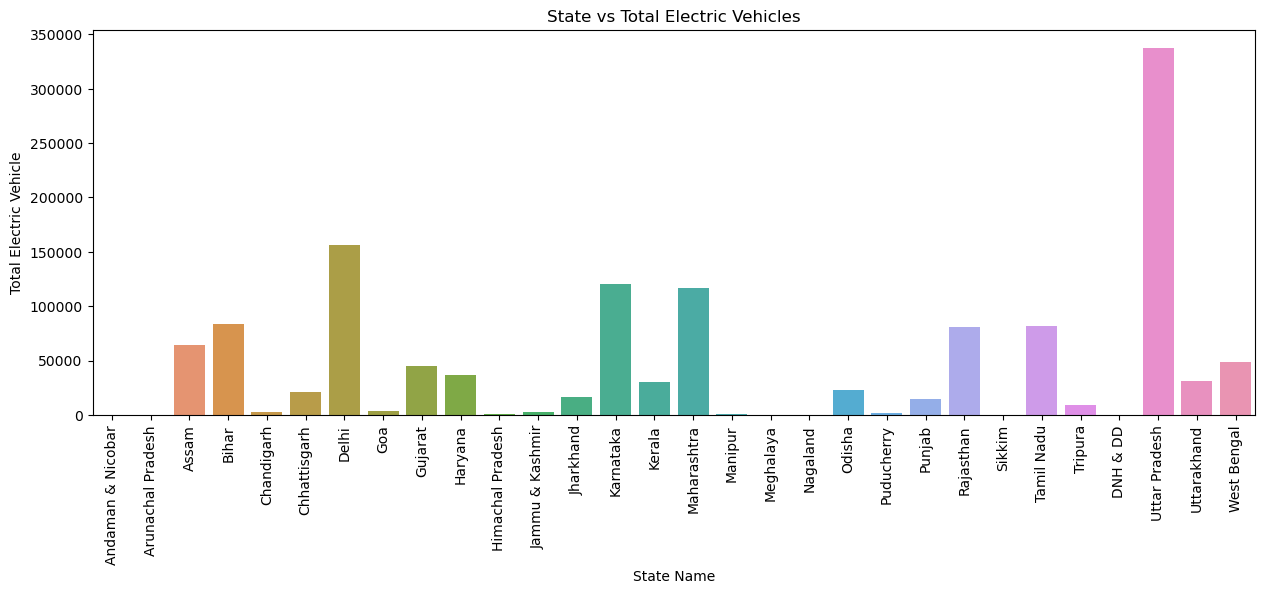

In [63]:
plt.figure(figsize=(15,5))
plt.title('State vs Total Electric Vehicles')
ax=sns.barplot(x='State Name',y='Total Electric Vehicle',data=location)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

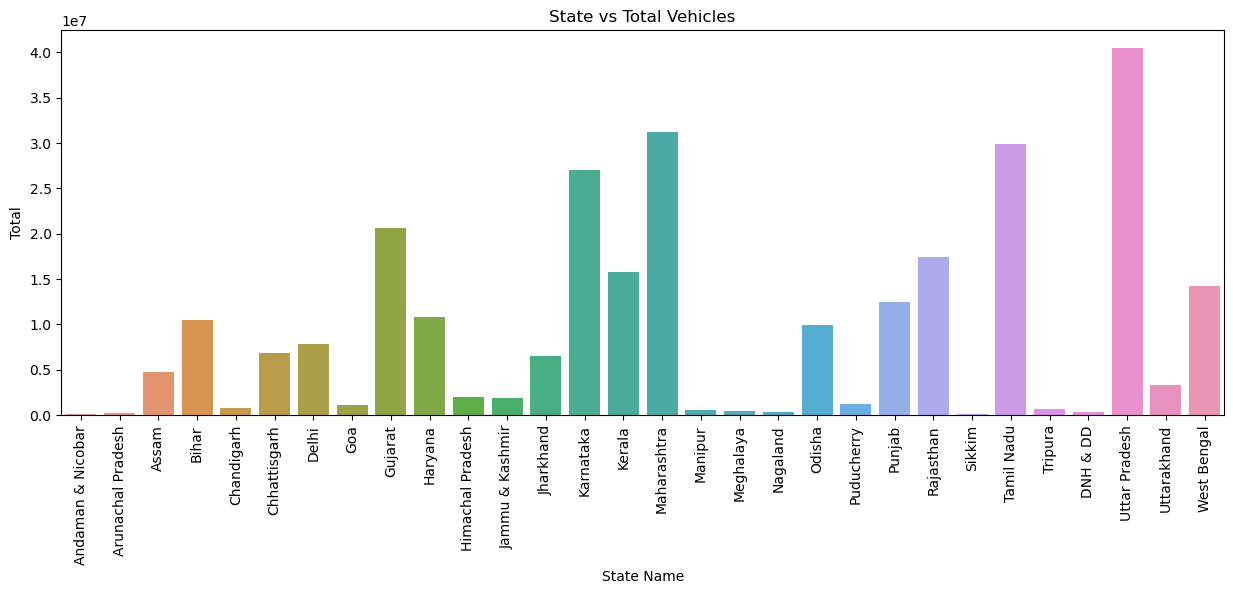

In [64]:
plt.figure(figsize=(15,5))
plt.title('State vs Total Vehicles')
ax=sns.barplot(x='State Name',y='Total',data=location)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [65]:
location['Percentage']=location['Total Electric Vehicle']/location['Total']

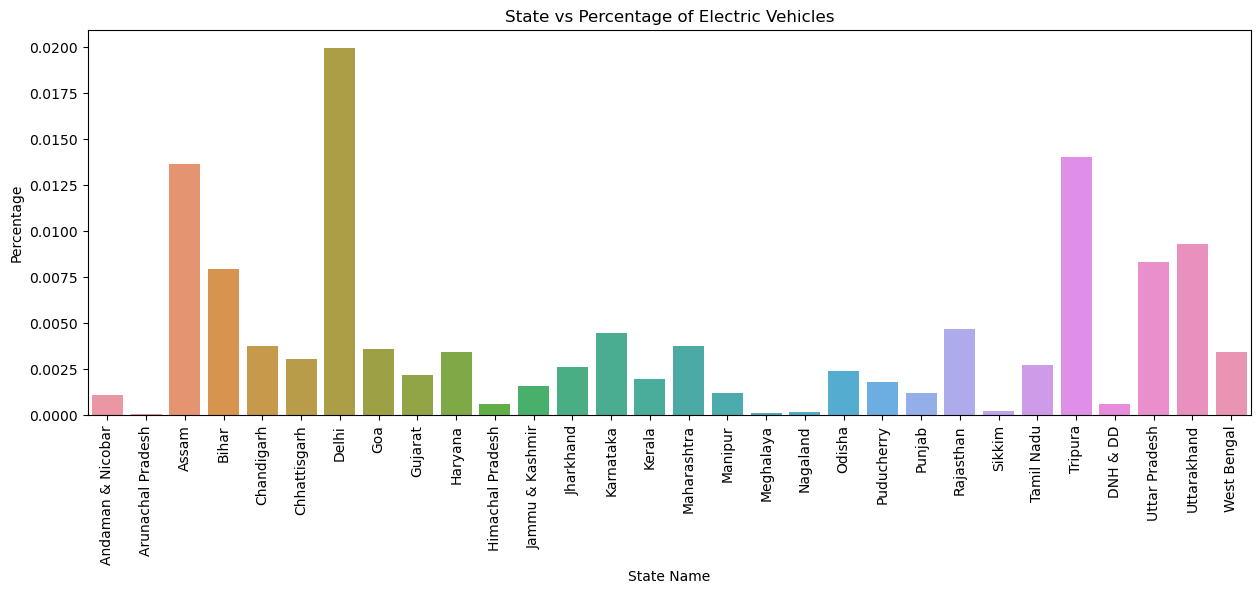

In [66]:
plt.figure(figsize=(15,5))
plt.title('State vs Percentage of Electric Vehicles')
ax=sns.barplot(x='State Name',y='Percentage',data=location)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

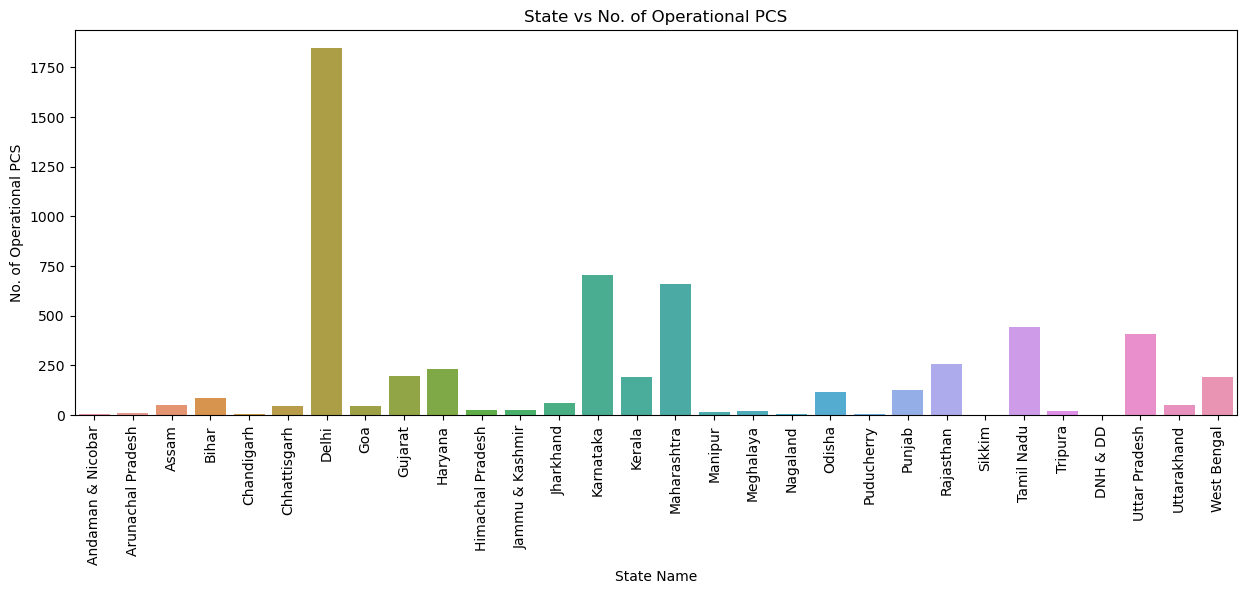

In [67]:
plt.figure(figsize=(15,5))
plt.title('State vs No. of Operational PCS')
ax=sns.barplot(x='State Name',y='No. of Operational PCS',data=location)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()